In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement_data.csv')

In [3]:
ndf = df

In [4]:
ndf.head()

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,79.0,NaN,81.0,75,2018,1
1,66.0,78.0,NaN,40,2022,1
2,67.0,NaN,NaN,77,2018,1
3,62.0,87.0,66.0,100,2021,3
4,78.0,85.0,80.0,20,2018,3


In [5]:
ndf.shape

(50, 6)

In [6]:
# PART I - 
# Scan all variables for missing values and inconsistencies. If there are missing values and/or
# inconsistencies, use any of the suitable techniques to deal with them.

In [7]:
ndf.isnull().sum()

math_score                3
reading_score            11
writing_score            12
placement_score           0
club_join_year            0
placement_offer_count     0
dtype: int64

In [8]:
#using drop method to to drop rows with math_score = null
ndf = ndf.dropna(subset=['math_score'])

In [9]:
ndf.isnull().sum()

math_score                0
reading_score            10
writing_score            12
placement_score           0
club_join_year            0
placement_offer_count     0
dtype: int64

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
#replacing reading_score and writing_score with mean value
mean_reading = ndf['reading_score'].mean()
mean_writing = ndf['writing_score'].mean()

ndf['reading_score'].fillna(mean_reading, inplace=True)
ndf['writing_score'].fillna(mean_writing, inplace=True) 

In [12]:
ndf.isnull().sum()

math_score               0
reading_score            0
writing_score            0
placement_score          0
club_join_year           0
placement_offer_count    0
dtype: int64

In [13]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   math_score             47 non-null     float64
 1   reading_score          47 non-null     float64
 2   writing_score          47 non-null     float64
 3   placement_score        47 non-null     int64  
 4   club_join_year         47 non-null     int64  
 5   placement_offer_count  47 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.6 KB


In [14]:
ndf.head()

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,79.0,73.972973,81.000000,75,2018,1
1,66.0,78.000000,78.257143,40,2022,1
2,67.0,73.972973,78.257143,77,2018,1
3,62.0,87.000000,66.000000,100,2021,3
4,78.0,85.000000,80.000000,20,2018,3


In [15]:
ndf['reading_score'] = ndf['reading_score'].astype(int)
ndf['writing_score'] = ndf['writing_score'].astype(int)

In [16]:
ndf.head()

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
0,79.0,73,81,75,2018,1
1,66.0,78,78,40,2022,1
2,67.0,73,78,77,2018,1
3,62.0,87,66,100,2021,3
4,78.0,85,80,20,2018,3


In [17]:
#now data no more contains missing values 

In [18]:
#PART II -
#Scan all numeric variables for outliers. If there are outliers, use any of the suitable
#techniques to deal with them.

<Axes: xlabel='placement_score', ylabel='Density'>

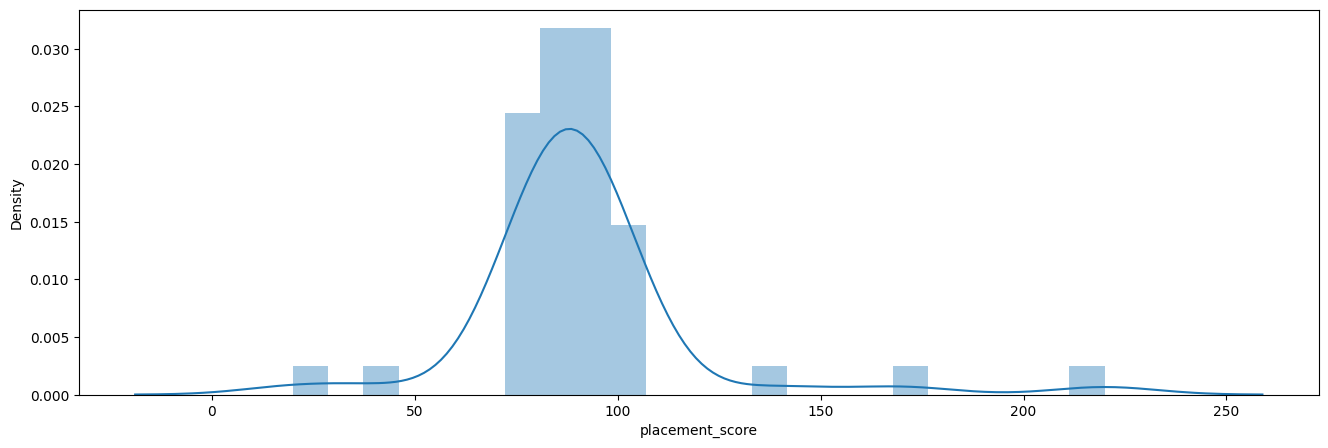

In [19]:
#checking if Z-SCORE method is applicable
plt.figure(figsize=(16,5))
plt.subplot(1,1,1)
sns.distplot(ndf['placement_score'])

In [20]:
print("Mean - ",ndf['placement_score'].mean())
print("Standard deviation - ",ndf['placement_score'].std())
print("Min - ",ndf['placement_score'].min())
print("Max - ",ndf['placement_score'].max())

Mean -  91.38297872340425
Standard deviation -  27.97091128102268
Min -  20
Max -  220


In [21]:
print("Highest allowed",ndf['placement_score'].mean() + 3*ndf['placement_score'].std())
print("Lowest allowed",ndf['placement_score'].mean() - 3*ndf['placement_score'].std())

Highest allowed 175.29571256647228
Lowest allowed 7.47024488033621


In [22]:
ndf[(ndf['placement_score']>175)| (ndf['placement_score'] < 7)]

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
21,76.0,62,78,220,2023,3


In [23]:
#here since data is not normally distributed this method does not detect outliers properly
#so another method is used known as IQR method

In [24]:
ndf['placement_score'].skew()

2.285636769153689

In [25]:
#getting the statistics
ndf['placement_score'].describe()

count     47.000000
mean      91.382979
std       27.970911
min       20.000000
25%       81.000000
50%       89.000000
75%       97.000000
max      220.000000
Name: placement_score, dtype: float64

<Axes: ylabel='placement_score'>

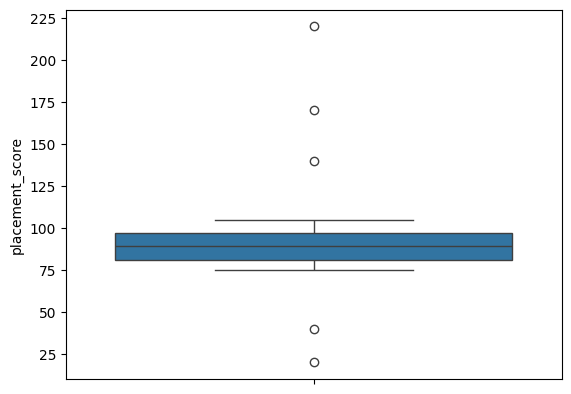

In [26]:
sns.boxplot(ndf['placement_score'])

In [27]:
p25 = ndf['placement_score'].quantile(0.25)
p75 = ndf['placement_score'].quantile(0.75)

In [28]:
p25

81.0

In [29]:
p75

97.0

In [30]:
iqr = p75 - p25

In [31]:
upper_bound = p75 + 1.5 * iqr
lower_bound = p25 - 1.5 * iqr

In [32]:
print("Upper bound", upper_bound)
print("Lower bound", lower_bound)

Upper bound 121.0
Lower bound 57.0


In [33]:
#showing the outliers

In [34]:
ndf[ndf['placement_score'] < lower_bound]

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
1,66.0,78,78,40,2022,1
4,78.0,85,80,20,2018,3


In [35]:
ndf[ndf['placement_score'] > upper_bound]

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
21,76.0,62,78,220,2023,3
39,64.0,82,68,140,2021,3
46,79.0,68,68,170,2022,3


In [36]:
ndf.shape

(47, 6)

In [37]:
ndf = ndf[ndf['placement_score'] > lower_bound]
ndf = ndf[ndf['placement_score'] < upper_bound]

In [38]:
ndf.shape

(42, 6)

<Axes: ylabel='placement_score'>

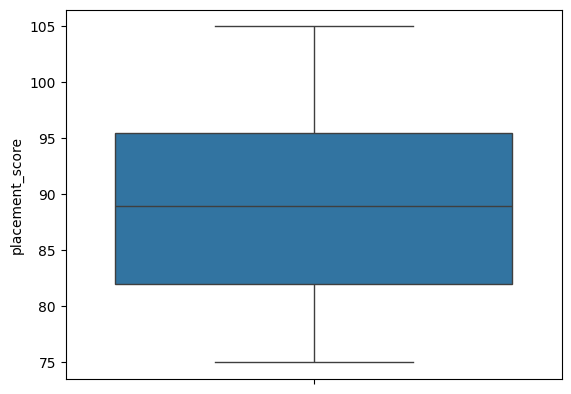

In [39]:
sns.boxplot(ndf['placement_score'])

In [40]:
# Apply data transformations on at least one of the variables. The purpose of this
# transformation should be one of the following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation into a linear one, or to
# decrease the skewness and convert the distribution into a normal distribution. 

In [41]:
ndf['placement_score'].skew()

0.06123337803033496

In [42]:
ndf['math_score'].skew()

0.02971629320164112

In [43]:
ndf['reading_score'].skew()

0.5378407957042785

In [44]:
ndf['writing_score'].skew()

-0.46536884849332333

In [45]:
#here all variables are Approximately symmetric

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [54]:
ndf['placement_score'] = scaler.fit_transform(ndf['placement_score'].values.reshape(-1, 1))

In [55]:
ndf.sample(10)

,math_score,reading_score,writing_score,placement_score,club_join_year,placement_offer_count
22,71.0,77,68,0.033333,2018,1
29,62.0,85,90,0.733333,2022,3
48,87.0,61,84,0.233333,2022,2
6,77.0,77,78,0.066667,2023,1
20,73.0,83,89,0.333333,2019,2
19,87.0,62,81,0.333333,2020,2
42,72.0,74,78,0.500000,2022,3
11,76.0,73,81,0.300000,2020,2
49,65.0,70,80,0.433333,2020,2
23,84.0,73,78,0.566667,2022,3


In [ ]:
#changed the scale of placement_score for better understanding of the variable